In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

### Dataset: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

### Importing the dataset

In [2]:
data=pd.read_csv('Casestudy2-Wholesale customers data.csv')
X=data.drop(['Channel','Region'],axis=1)
y=data['Channel']



### Data Exploration

In [3]:
X.info()
X.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


(440, 6)

In [4]:
X.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
X.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


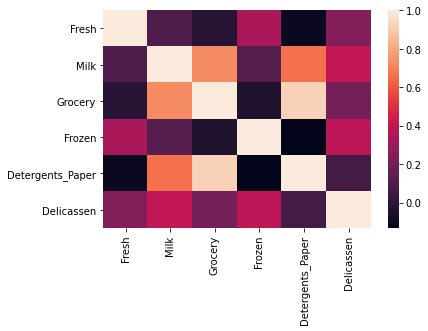

In [7]:
sns.heatmap(X.corr())

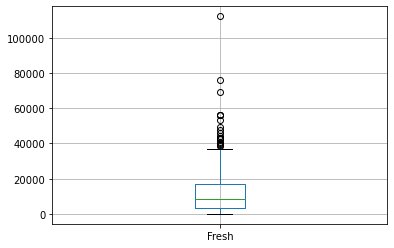

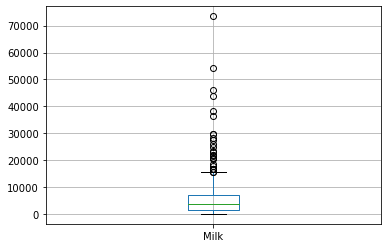

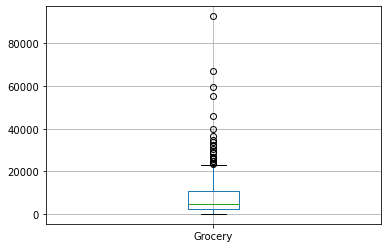

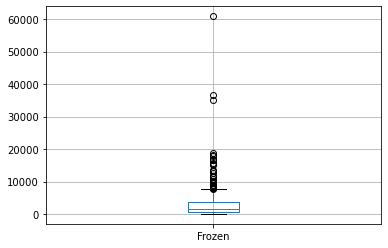

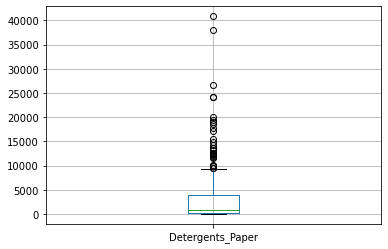

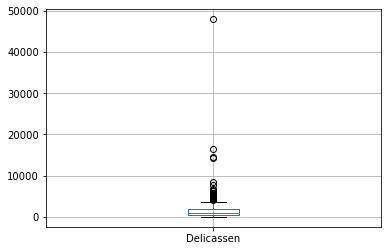

In [8]:

for column in X:
    plt.figure()
    X.boxplot([column])



In [9]:

def outliersolution(col):
    Q1=np.percentile(X[col],25)
    Q3=np.percentile(X[col],75)
    upperrange = Q3 + (1.5 * (Q3-Q1))
    X[X[col]>upperrange]=upperrange
    plt.boxplot(X[col])
    plt.xlabel(col)
    plt.show()
    


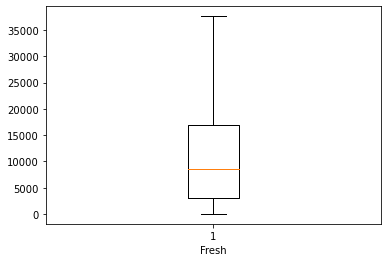

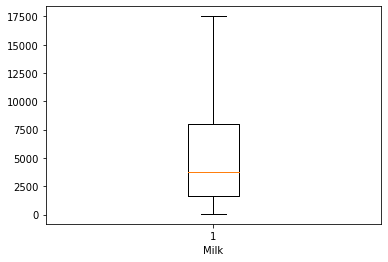

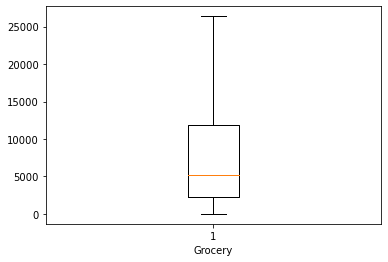

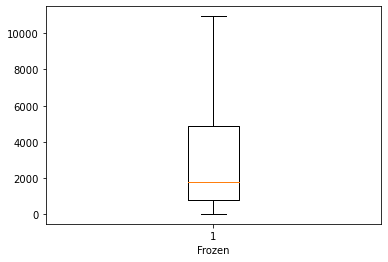

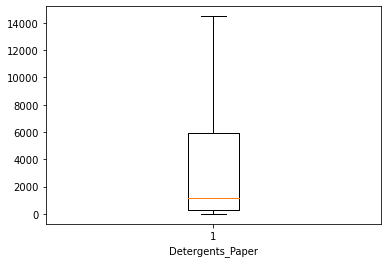

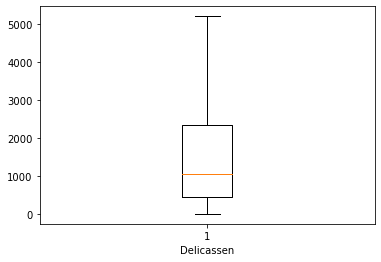

In [10]:
for i in X:
    outliersolution(i)

In [11]:
print(X.describe())

              Fresh          Milk       Grocery        Frozen  \
count    440.000000    440.000000    440.000000    440.000000   
mean    9011.482386   4432.743750   6048.057386   2699.714205   
std     7766.758791   3232.825004   5106.353213   2370.689548   
min        3.000000     55.000000      3.000000     25.000000   
25%     3454.250000   1701.750000   2259.250000    796.000000   
50%     5825.000000   4038.000000   5199.875000   1824.500000   
75%    12671.750000   5791.750000   7889.000000   5199.875000   
max    37036.000000  15729.000000  24773.000000  10643.000000   

       Detergents_Paper   Delicassen  
count        440.000000   440.000000  
mean        2642.896023  1746.398295  
std         2782.960489  1741.625488  
min            3.000000     3.000000  
25%          287.000000   435.500000  
50%         1221.000000  1053.000000  
75%         5199.875000  2341.250000  
max        14235.000000  5199.875000  


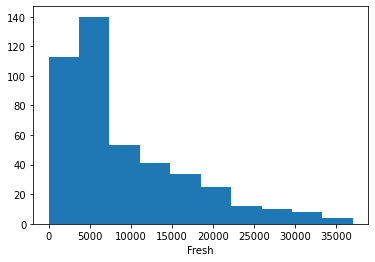

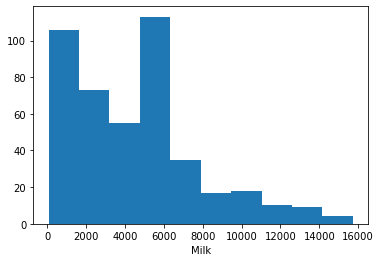

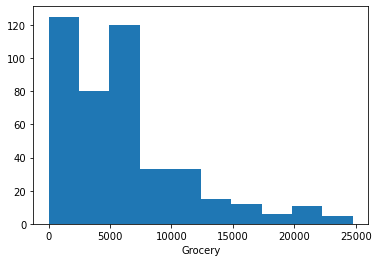

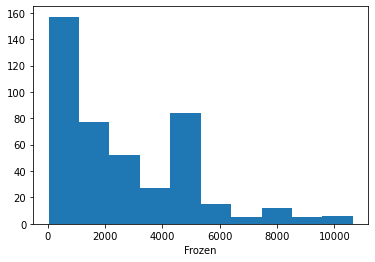

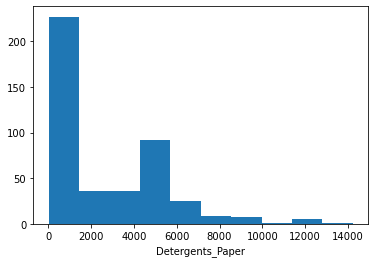

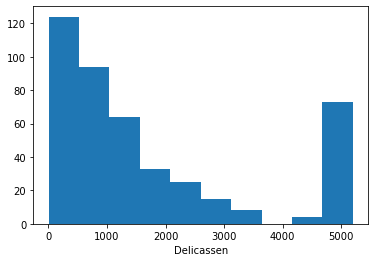

In [12]:
def plots(dist):
    plt.hist(X[dist])
    plt.xlabel(dist)
    plt.show()
    
for x in X:
    plots(x)

### Data Transformation

In [13]:
X=np.sqrt(X)
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,112.556652,98.264948,86.954011,14.628739,51.710734,36.578682
1,84.005952,99.045444,97.816154,41.976184,57.384667,42.142615
2,72.110159,72.110159,72.110159,72.110159,72.110159,72.110159
3,115.173782,34.583233,64.969223,80.024996,22.516660,42.284749
4,150.382845,73.552702,84.841028,62.569961,42.154478,72.006944


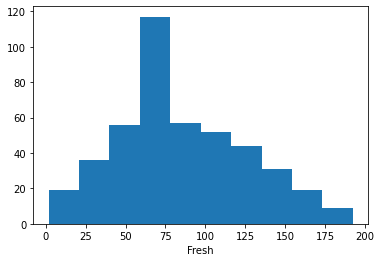

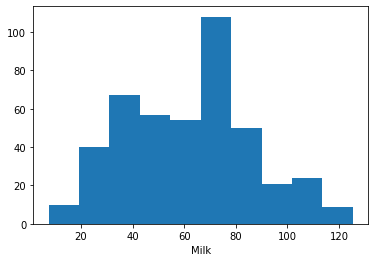

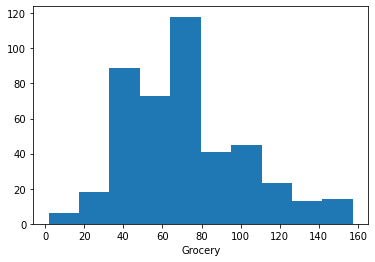

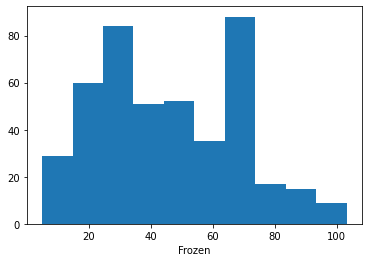

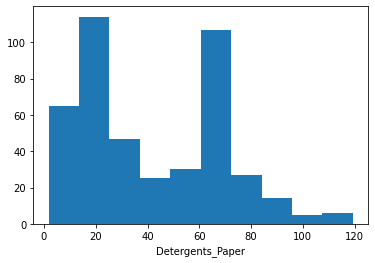

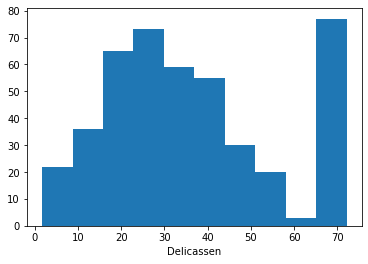

In [14]:
def plots(dist):
    plt.hist(X[dist])
    plt.xlabel(dist)
    plt.show()
    
for x in X:
    plots(x)

In [15]:
print(y.head())

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64


0    1
1    1
2    1
3    0
4    1
Name: Channel, dtype: int64


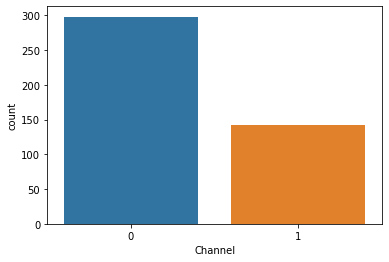

In [16]:
y[y==1]=0
y[y==2]=1
print(y.head())
sns.countplot(y)

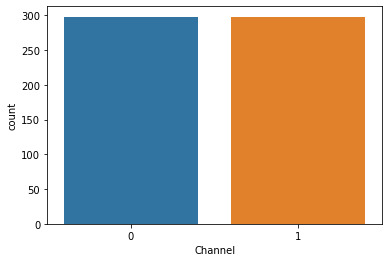

In [17]:
from imblearn.over_sampling import SMOTE
samp = SMOTE()
x_res,y_res=samp.fit_sample(X,y)
sns.countplot(y_res)

In [18]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(x_res,y_res,test_size=0.4,random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
LRG=LogisticRegression()
LRG.fit(Xtrain,ytrain)
ypred=LRG.predict(Xtest)

In [21]:
cm=confusion_matrix(ytest,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(ytest,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1])) 

[[ 97  22]
 [  9 111]]
Overall accuracy score is  0.8702928870292888
Accurcay for class 0 is  0.8151260504201681
Accuracy for class 1 is  0.925


### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=50,max_depth=20,criterion='entropy',random_state=0)
RFC.fit(Xtrain,ytrain)
ypred=RFC.predict(Xtest)

In [23]:
cm=confusion_matrix(ytest,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(ytest,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1])) 

[[ 95  24]
 [  4 116]]
Overall accuracy score is  0.8828451882845189
Accurcay for class 0 is  0.7983193277310925
Accuracy for class 1 is  0.9666666666666667


### XGBoost

In [24]:
import xgboost as xgb
from xgboost import XGBClassifier
XGB = XGBClassifier(n_estimators=60,learning_rate=0.05,max_depth=20,random_state=0)
XGB.fit(Xtrain,ytrain)
ypred=XGB.predict(Xtest)

In [25]:
cm=confusion_matrix(ytest,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(ytest,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1])) 

[[ 95  24]
 [  4 116]]
Overall accuracy score is  0.8828451882845189
Accurcay for class 0 is  0.7983193277310925
Accuracy for class 1 is  0.9666666666666667


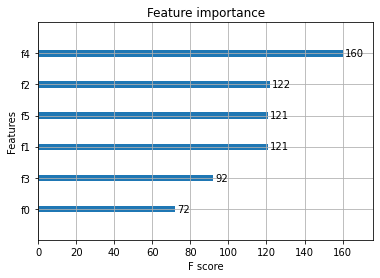

In [26]:
xgb.plot_importance(XGB)

### Suppot Vector Classifier

In [29]:
from sklearn.svm import SVC
SVC = SVC(kernel='rbf')
SVC.fit(Xtrain,ytrain)
ypred=SVC.predict(Xtest)

In [30]:
cm=confusion_matrix(ytest,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(ytest,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1])) 

[[ 97  22]
 [  4 116]]
Overall accuracy score is  0.891213389121339
Accurcay for class 0 is  0.8151260504201681
Accuracy for class 1 is  0.9666666666666667


### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(Xtrain,ytrain)
ypred=DTC.predict(Xtest)

In [32]:
cm=confusion_matrix(ytest,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(ytest,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1])) 

[[ 96  23]
 [  8 112]]
Overall accuracy score is  0.8702928870292888
Accurcay for class 0 is  0.8067226890756303
Accuracy for class 1 is  0.9333333333333333


### Linear Discriminant Analysis

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA = LDA()
LDA.fit(Xtrain,ytrain)
ypred=LDA.predict(Xtest)

In [34]:
cm=confusion_matrix(ytest,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(ytest,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1])) 


[[ 95  24]
 [  7 113]]
Overall accuracy score is  0.8702928870292888
Accurcay for class 0 is  0.7983193277310925
Accuracy for class 1 is  0.9416666666666667


### Light GBM

In [39]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier(n_estimators=50,learning_rate=0.05,random_state=0)
LGBM.fit(Xtrain,ytrain)
ypred=LGBM.predict(Xtest)

In [40]:
cm=confusion_matrix(ytest,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(ytest,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))

[[ 94  25]
 [  5 115]]
Overall accuracy score is  0.8744769874476988
Accurcay for class 0 is  0.7899159663865546
Accuracy for class 1 is  0.9583333333333334


### Gradient Boosting Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier 
GBC = GradientBoostingClassifier(n_estimators=80,learning_rate=0.05,max_depth=2,random_state=0)
GBC.fit(Xtrain,ytrain)
ypred=GBC.predict(Xtest)

In [42]:
cm=confusion_matrix(ytest,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(ytest,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))

[[ 94  25]
 [  3 117]]
Overall accuracy score is  0.8828451882845189
Accurcay for class 0 is  0.7899159663865546
Accuracy for class 1 is  0.975


### K Nearest Neigbours

In [43]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 7)
KNN.fit(Xtrain,ytrain)
ypred=KNN.predict(Xtest)

In [44]:
cm=confusion_matrix(ytest,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(ytest,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))

[[109  10]
 [ 22  98]]
Overall accuracy score is  0.8661087866108786
Accurcay for class 0 is  0.9159663865546218
Accuracy for class 1 is  0.8166666666666667


### Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(Xtrain,ytrain)
ypred=GNB.predict(Xtest)

In [46]:
cm=confusion_matrix(ytest,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(ytest,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))

[[ 96  23]
 [ 11 109]]
Overall accuracy score is  0.8577405857740585
Accurcay for class 0 is  0.8067226890756303
Accuracy for class 1 is  0.9083333333333333


### Voting Classifier

In [50]:
from sklearn.ensemble import VotingClassifier
estimators=[('SVC',SVC),('RFC',RFC),('XGB',XGB),('GBC',GBC)]
ens=VotingClassifier(estimators=estimators,voting='hard')
ens.fit(Xtrain,ytrain)
ypred=ens.predict(Xtest)

In [51]:
cm=confusion_matrix(ytest,ypred)
print(cm)
print('Overall accuracy score is ',accuracy_score(ytest,ypred))
print('Accurcay for class 0 is ' , cm[0,0]/(cm[0,0]+cm[0,1]))
print('Accuracy for class 1 is ' , cm[1,1]/(cm[1,0]+cm[1,1]))

[[ 97  22]
 [  3 117]]
Overall accuracy score is  0.895397489539749
Accurcay for class 0 is  0.8151260504201681
Accuracy for class 1 is  0.975
